In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style('darkgrid')
%matplotlib inline

In [2]:
data = pd.read_csv('./pp_test_train.csv')

In [3]:
data.head()

,PID,SitusZip,Bathrooms,SquareFootage,LotSize,YearBuilt,TaxAmount,MarketValue,TaxExemptionAmountHomeowner,EstimatedValue,NumberOfStories,MarketImprovementPercent,MarketImprovementValue,MarketLandValue,var_x,vacant,y
0,204172,78737,3.0,2054,78844.0,1981,6835,361978,0,438000,1,59.0,217178,144800,0.4780,0,0
1,240222,78660,2.0,1717,7209.0,2002,4734,166595,0,199000,1,81.0,136595,30000,0.5516,0,0
2,244342,78727,3.0,1693,7876.0,1984,5103,215294,0,279000,2,65.0,140294,75000,0.3238,0,0
3,255028,78758,2.0,1397,7836.0,1976,4271,191520,0,270000,1,68.0,131520,60000,0.8501,0,0
4,276096,78660,2.0,1200,6186.0,1998,3928,138235,0,165000,1,81.0,111985,26250,0.1190,0,0


In [4]:
data.describe()

,PID,SitusZip,Bathrooms,SquareFootage,LotSize,YearBuilt,TaxAmount,MarketValue,TaxExemptionAmountHomeowner,EstimatedValue,NumberOfStories,MarketImprovementPercent,MarketImprovementValue,MarketLandValue,var_x,vacant,y
count,9.205400e+04,92054.000000,92054.000000,92054.000000,9.205400e+04,92054.000000,92054.000000,9.205400e+04,92054.00000,92054.000000,92054.000000,92054.000000,9.205400e+04,9.205400e+04,92054.000000,92054.000000,92054.000000
mean,8.467667e+07,78721.416299,2.176218,1768.936809,1.440980e+04,1981.591512,6314.228268,2.934975e+05,2.92122,341153.479414,1.290254,67.412215,1.872295e+05,1.060465e+05,0.499249,0.005290,0.045039
std,6.773937e+07,39.925548,0.701359,551.684023,4.726742e+04,20.362993,3064.976887,1.471466e+05,263.39223,156963.350484,0.461524,19.922266,8.794404e+04,1.105263e+05,0.288428,0.072543,0.207390
min,2.041720e+05,76574.000000,0.000000,700.000000,0.000000e+00,1875.000000,0.000000,1.500000e+02,0.00000,52000.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,2.927594e+07,78704.000000,2.000000,1333.000000,6.691000e+03,1969.000000,4239.000000,1.913465e+05,0.00000,229000.000000,1.000000,56.000000,1.260610e+05,3.500000e+04,0.250200,0.000000,0.000000
50%,4.762753e+07,78736.000000,2.000000,1701.000000,8.307000e+03,1983.000000,5575.000000,2.549050e+05,0.00000,300000.000000,1.000000,75.000000,1.676110e+05,5.700000e+04,0.498400,0.000000,0.000000
75%,1.662892e+08,78749.000000,3.000000,2173.000000,1.108600e+04,1999.000000,7780.000000,3.623542e+05,0.00000,411000.000000,2.000000,83.000000,2.342465e+05,1.350000e+05,0.748800,0.000000,0.000000
max,2.522983e+08,78759.000000,12.000000,2999.000000,6.361921e+06,2011.000000,107298.000000,5.682157e+06,33713.00000,999000.000000,3.000000,100.000000,3.346290e+06,5.609880e+06,1.000000,1.000000,1.000000


In [5]:
data.isnull().any()

PID                            False
SitusZip                       False
Bathrooms                      False
SquareFootage                  False
LotSize                        False
YearBuilt                      False
TaxAmount                      False
MarketValue                    False
TaxExemptionAmountHomeowner    False
EstimatedValue                 False
NumberOfStories                False
MarketImprovementPercent       False
MarketImprovementValue         False
MarketLandValue                False
var_x                          False
vacant                         False
y                              False
dtype: bool

In [6]:
corr = data[[x for x in data.columns if x not in {'PID'}]].corr()

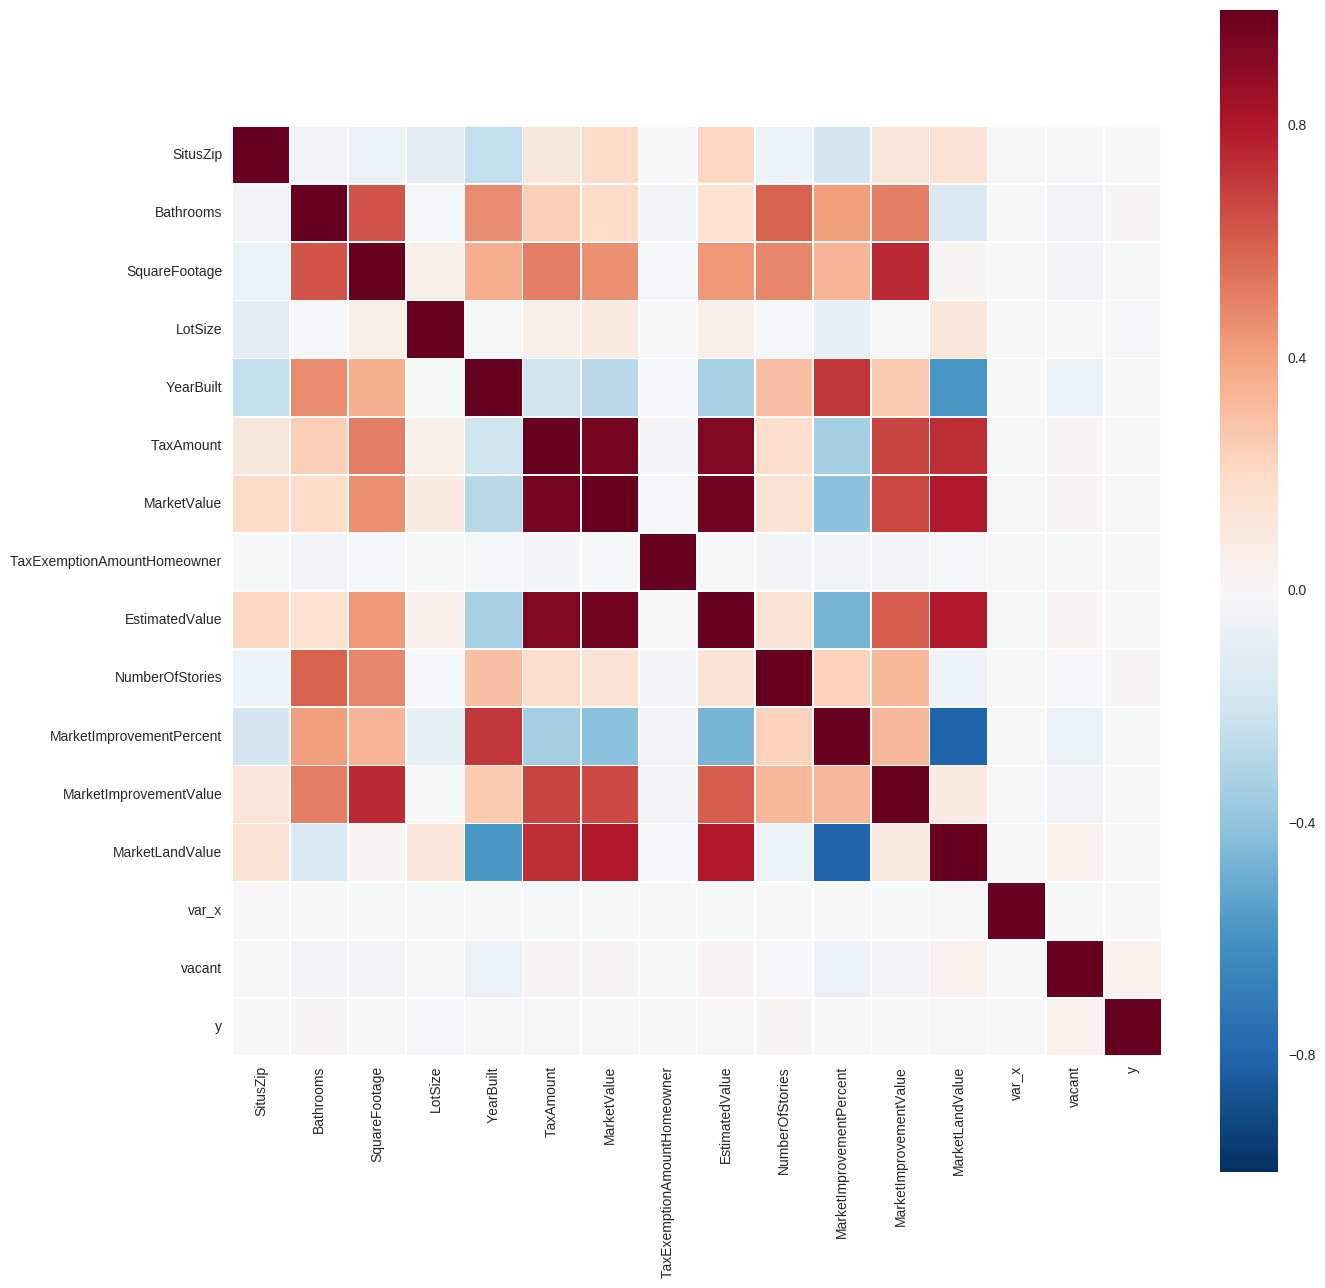

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(corr, square=True, linewidths=.5)

In [8]:
def univariate(data, var_name, response_name, bins=10):
    ''' quick function to build a histogram of one variable and 
        show the mean of the response variable for each bin '''
    
    fig, ax = plt.subplots()
    values, bins, patches = plt.hist(data[var_name], bins=bins)
    ax.yaxis.set_label_text('Count')
    ax.xaxis.set_label_text(var_name)
        
    # adding small value to last bin so np.digitize handles it like matplotlib
    temp_bins = bins
    if isinstance(temp_bins[-1], int):
        temp_bins[-1] = temp_bins[-1] + 1
    elif isinstance(temp_bins[-1], float):
        temp_bins[-1] = temp_bins[-1] + 0.000000001
        
    data_grouped_by_var_bins = data.groupby(np.digitize(data[var_name], temp_bins))
    response_mean_by_bins = data_grouped_by_var_bins[response_name].mean()
    mean_x = []
    mean_y = []
    for series_idx, response_mean in response_mean_by_bins.iteritems():
        mean_y.append(response_mean)
        bin_center = (bins[series_idx - 1] + bins[series_idx]) / 2
        mean_x.append(bin_center)
        
    ax2 = ax.twinx()
    plt.plot(mean_x, mean_y, color='red', linewidth=0.5, marker='.')
    ax2.yaxis.set_label_text(response_name)
    plt.show()

## NumberOfStories

[1 2 0 3]


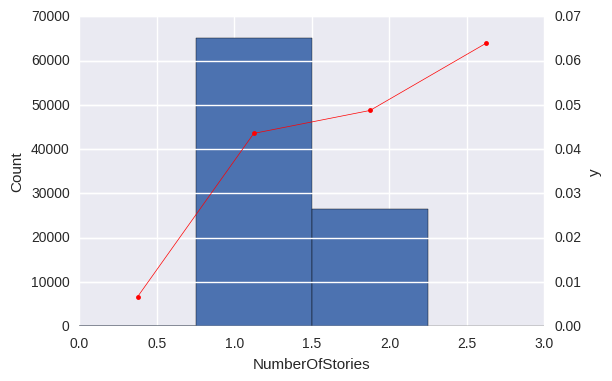

In [9]:
var = 'NumberOfStories'
distinct_vals = data[var].unique()
print(distinct_vals)
num_vals = len(distinct_vals)
univariate(data, var, 'y', bins=num_vals)

## Bathrooms

[  3.     2.     1.     5.     4.     0.     0.25   6.     1.75   1.7    7.
   2.7    2.5    8.     0.5    1.5   12.  ]


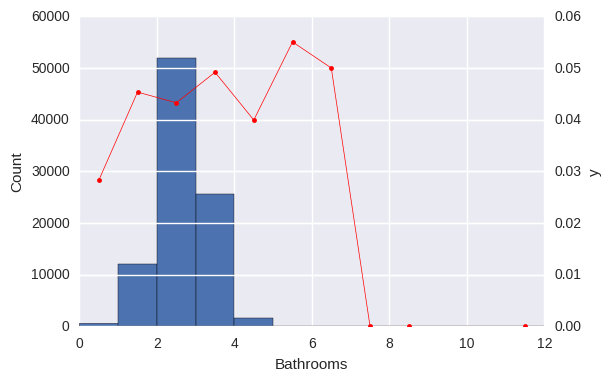

In [10]:
var = 'Bathrooms'
distinct_vals = data[var].unique()
print(distinct_vals)
num_vals = len(distinct_vals)
univariate(data, var, 'y', bins=12)

[ 3.    2.    1.    4.    0.    0.25  1.75  1.7   2.7   2.5   0.5   1.5 ]


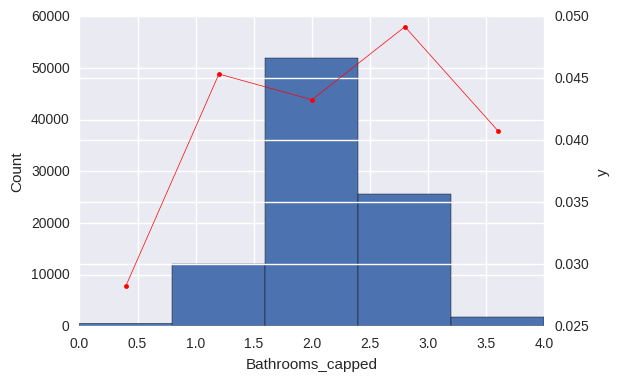

In [11]:
# probably need to cap the high values
data['Bathrooms_capped'] = np.clip(data['Bathrooms'], 0.0, 4.0)
var = 'Bathrooms_capped'
distinct_vals = data[var].unique()
print(distinct_vals)
num_vals = len(distinct_vals)
univariate(data, var, 'y', bins=5)

## vacant

[0 1]


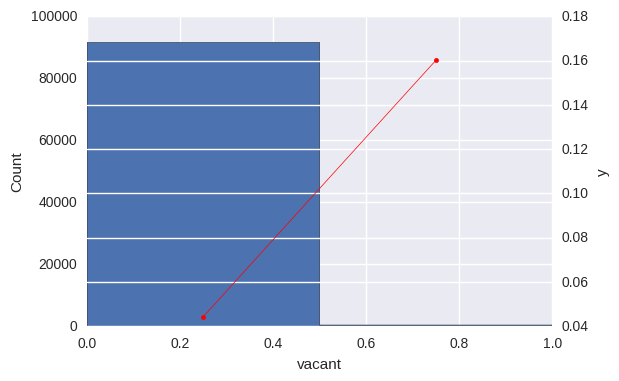

In [12]:
var = 'vacant'
distinct_vals = data[var].unique()
print(distinct_vals)
num_vals = len(distinct_vals)
univariate(data, var, 'y', bins=2)

## TaxExemptionAmountHomeowner

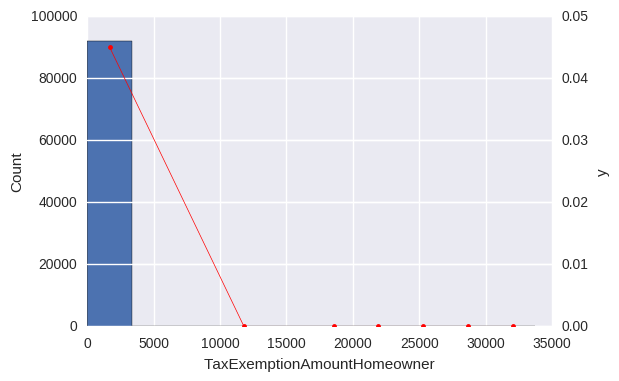

In [13]:
var = 'TaxExemptionAmountHomeowner'
univariate(data, var, 'y', bins=10)

In [14]:
sum(data['TaxExemptionAmountHomeowner'] > 0.0)

12

In [15]:
var = 'TaxExemptionAmountHomeowner'
data['has_tax_exemption'] = data['TaxExemptionAmountHomeowner'] > 0.0

## LotSize

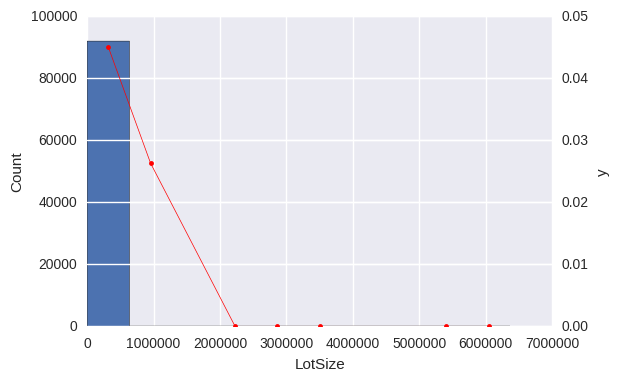

In [16]:
var = 'LotSize'
univariate(data, var, 'y', bins=10)

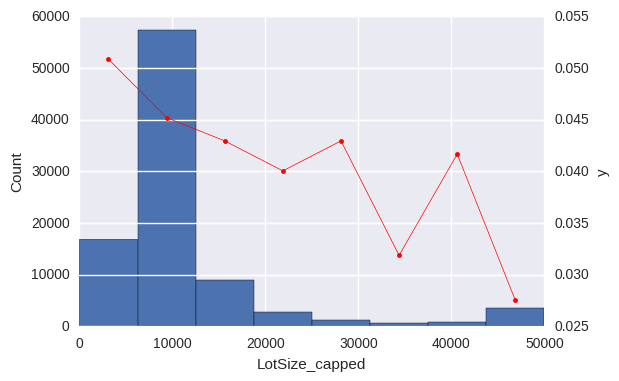

In [17]:
# probably need to cap the high values
data['LotSize_capped'] = np.clip(data['LotSize'], 0.0, 50000.0)
var = 'LotSize_capped'
univariate(data, var, 'y', bins=8)

## YearBuilt

[1981 2002 1984 1976 1998 1965 2000 1952 1978 1975 1979 1960 1996 1972 2001
 1999 1973 1982 1940 1980 1985 1969 1948 1967 1986 1993 1977 1947 1997 1963
 1970 1955 1995 2004 2005 2003 1992 1983 1994 1954 1964 1958 1957 1990 1987
 1971 1910 1945 2006 1966 1962 1959 1935 1946 1974 2007 1988 1950 1956 1961
 1968 1953 2010 1991 1900 1925 1928 1949 1930 1941 1920 1923 1939 2009 1934
 2008 1905 1989 1942 1922 1933 1915 1951 1929 1938 1937 1932 1917 1927 2011
 1931 1944 1936 1924 1943 1926 1921 1902 1912 1903 1916 1908 1907 1906 1914
 1904 1909 1918 1919 1913 1901 1911 1890 1893 1897 1875 1894 1895]


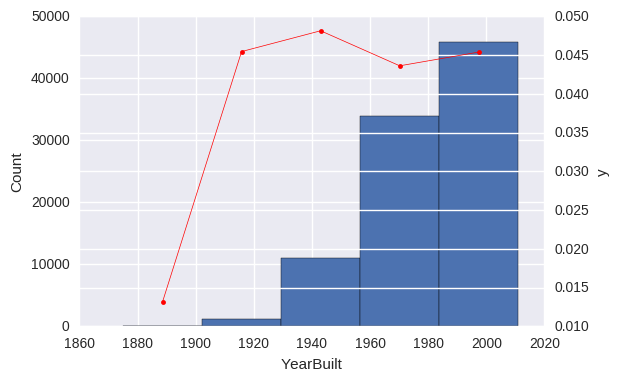

In [18]:
var = 'YearBuilt'
distinct_vals = data[var].unique()
print(distinct_vals)
num_vals = len(distinct_vals)
univariate(data, var, 'y', bins=5)

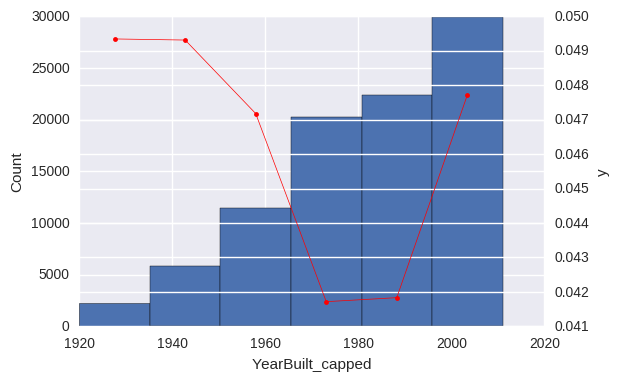

In [19]:
# probably need to cap the low values
data['YearBuilt_capped'] = np.clip(data['YearBuilt'], 1920, None)
var = 'YearBuilt_capped'
univariate(data, var, 'y', bins=6)

In [20]:
val, bins = np.histogram(data['YearBuilt_capped'], bins=6)
data['YearBuilt_binned'] = np.digitize(data['YearBuilt_capped'], bins=bins)

## TaxAmount

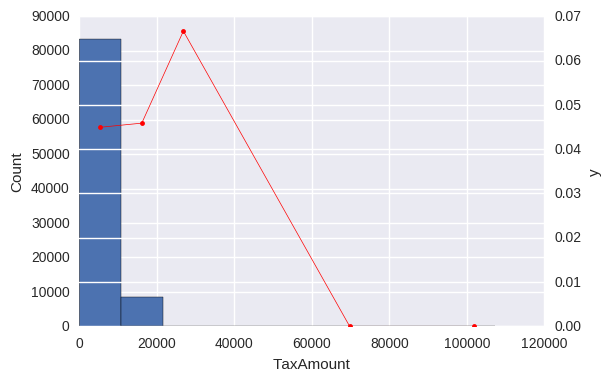

In [21]:
var = 'TaxAmount'
univariate(data, var, 'y', bins=10)

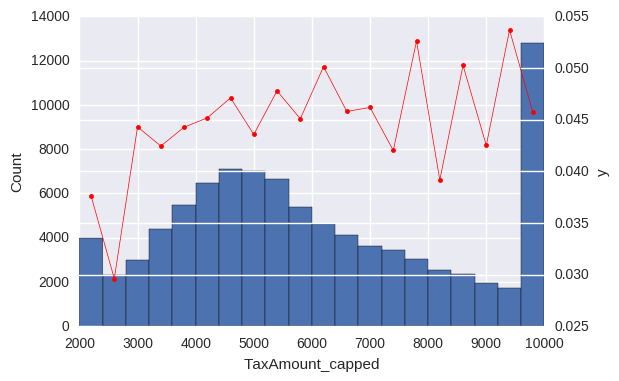

In [22]:
data['TaxAmount_capped'] = np.clip(data['TaxAmount'], 2000, 10000)
var = 'TaxAmount_capped'
univariate(data, var, 'y', bins=20)

## MarketValue

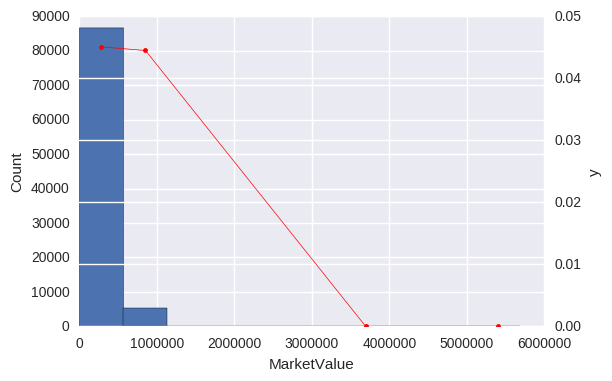

In [23]:
var = 'MarketValue'
univariate(data, var, 'y', bins=10)

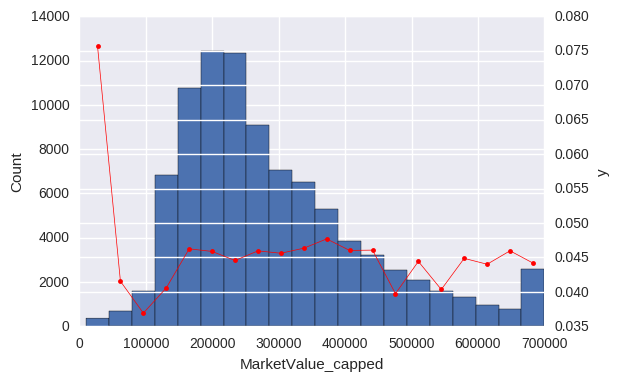

In [24]:
data['MarketValue_capped'] = np.clip(data['MarketValue'], 10000, 700000)
var = 'MarketValue_capped'
univariate(data, var, 'y', bins=20)

## EstimatedValue

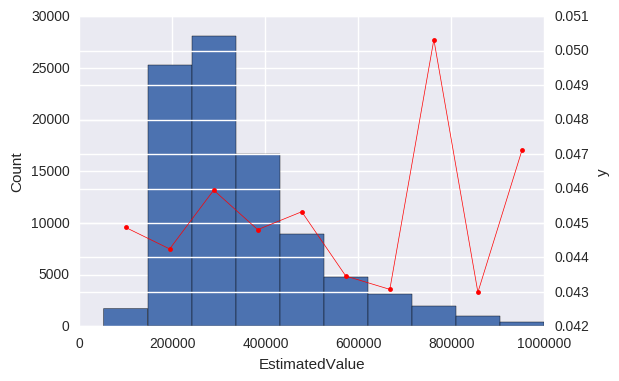

In [25]:
var = 'EstimatedValue'
univariate(data, var, 'y', bins=10)

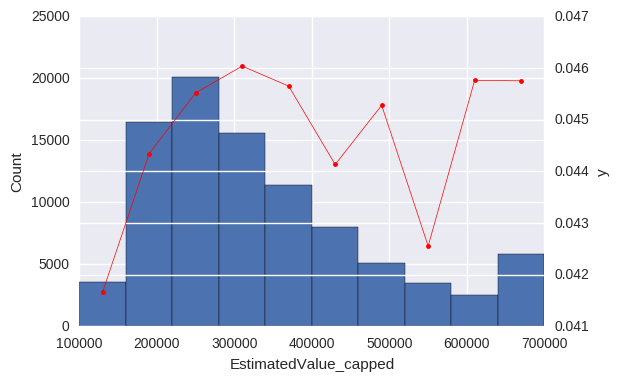

In [26]:
data['EstimatedValue_capped'] = np.clip(data['EstimatedValue'], 100000, 700000)
var = 'EstimatedValue_capped'
univariate(data, var, 'y', bins=10)

## Calculate Difference between Estimated and Market

In [27]:
data['estimated_minus_market'] = data['EstimatedValue'] - data['MarketValue']

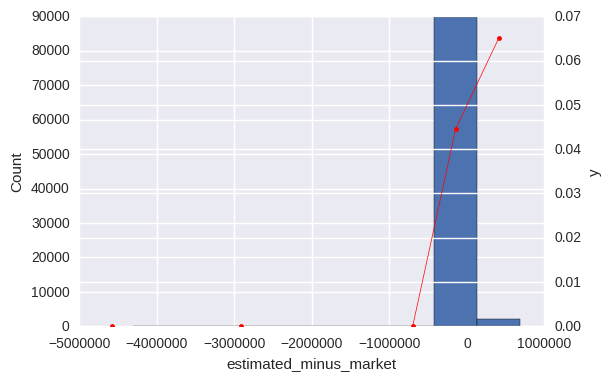

In [28]:
var = 'estimated_minus_market'
univariate(data, var, 'y', bins=10)

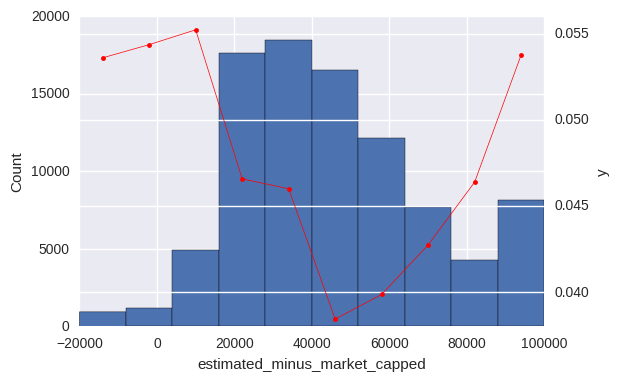

In [29]:
data['estimated_minus_market_capped'] = np.clip(data['estimated_minus_market'], -20000, 100000)
var = 'estimated_minus_market_capped'
univariate(data, var, 'y', bins=10)

## MarketImprovementPercent

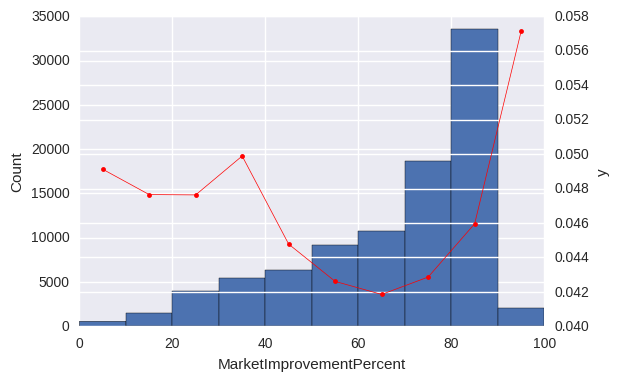

In [30]:
var = 'MarketImprovementPercent'
univariate(data, var, 'y', bins=10)

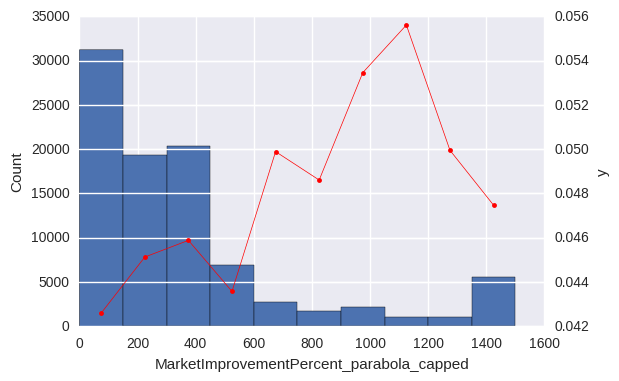

In [31]:
data['MarketImprovementPercent_parabola'] = (data['MarketImprovementPercent'] - 65) ** 2
data['MarketImprovementPercent_parabola_capped'] = np.clip(data['MarketImprovementPercent_parabola'], 0, 1500)
var = 'MarketImprovementPercent_parabola_capped'
univariate(data, var, 'y', bins=10)

## MarketImprovementValue

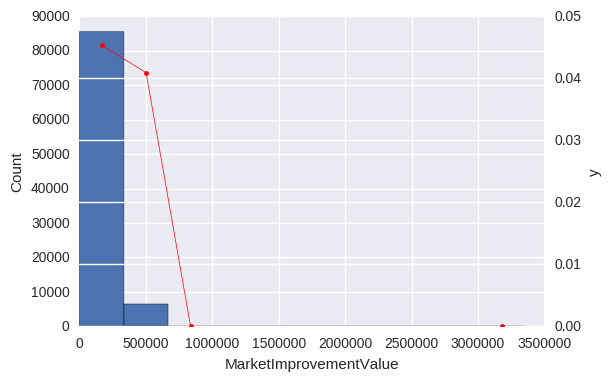

In [32]:
var = 'MarketImprovementValue'
univariate(data, var, 'y', bins=10)

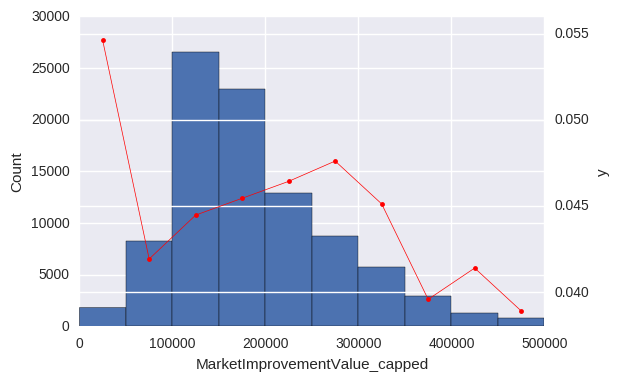

In [33]:
data['MarketImprovementValue_capped'] = np.clip(data['MarketImprovementValue'], 0, 500000)
var = 'MarketImprovementValue_capped'
univariate(data, var, 'y', bins=10)

## MarketLandValue

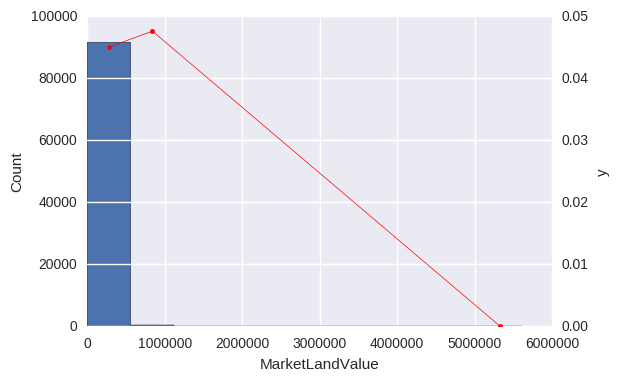

In [34]:
var = 'MarketLandValue'
univariate(data, var, 'y', bins=10)

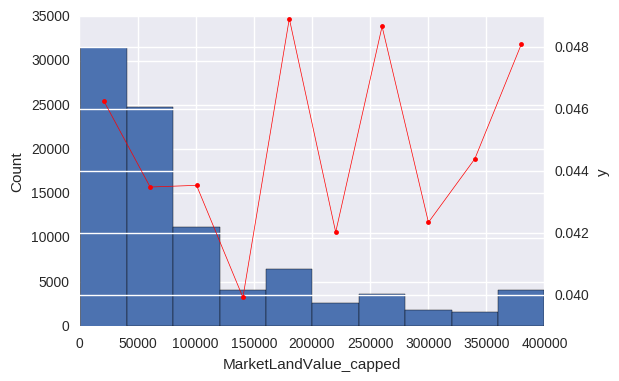

In [35]:
data['MarketLandValue_capped'] = np.clip(data['MarketLandValue'], 1000, 400000)
var = 'MarketLandValue_capped'
univariate(data, var, 'y', bins=10)

## var_x

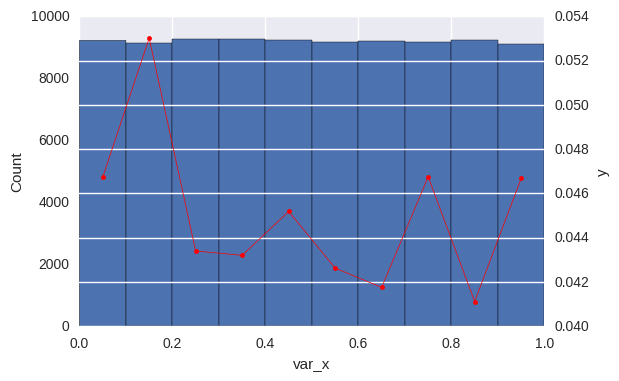

In [36]:
var = 'var_x'
univariate(data, var, 'y', bins=10)

In [37]:
val, bins = np.histogram(data['var_x'], bins=10)
data['var_x_binned'] = np.digitize(data['var_x'], bins=bins)

## SitusZip

[78737 78660 78727 78758 78723 78725 78617 78752 78744 78724 78753 78748
 78749 78653 78759 78722 78702 78747 78664 78729 78721 78745 78738 78645
 78754 78751 78728 78734 78704 78741 78746 78621 78669 78750 78613 78641
 78739 78733 78756 78731 78610 78703 78736 78757 78620 78732 78730 78705
 78742 78735 78726 78652 78719 78634 78701 78615 78612 78654 78642 78663
 76574 78616]


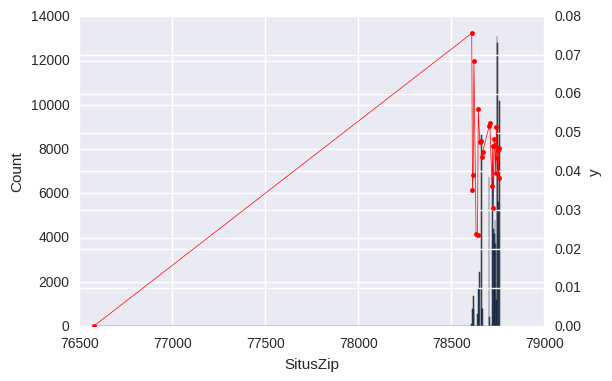

In [38]:
var = 'SitusZip'
distinct_vals = data[var].unique()
print(distinct_vals)
num_vals = len(distinct_vals)
univariate(data, var, 'y', bins=num_vals+500)

[78 76]


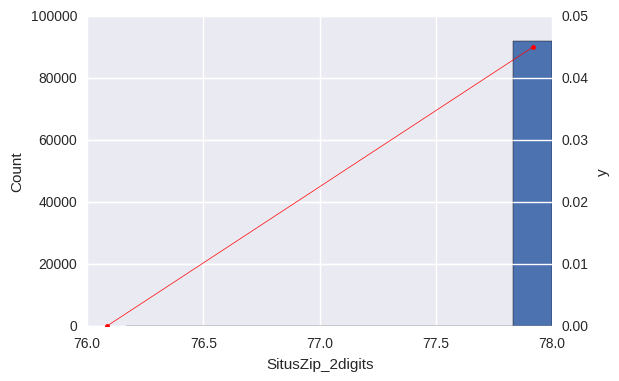

In [39]:
data['SitusZip_2digits'] = data['SitusZip'].apply(lambda x: x // 1000)
var = 'SitusZip_2digits'
distinct_vals = data[var].unique()
print(distinct_vals)
num_vals = len(distinct_vals)
univariate(data, var, 'y', bins=num_vals+10)

[787 786 765]


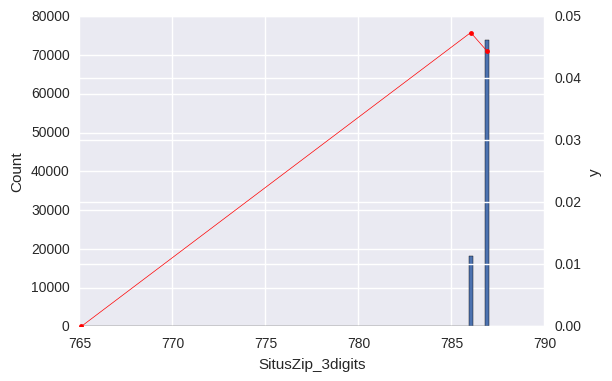

In [40]:
data['SitusZip_3digits'] = data['SitusZip'].apply(lambda x: x // 100)
var = 'SitusZip_3digits'
distinct_vals = data[var].unique()
print(distinct_vals)
num_vals = len(distinct_vals)
univariate(data, var, 'y', bins=num_vals+100)

[7873 7866 7872 7875 7861 7874 7865 7870 7864 7862 7871 7863 7657]


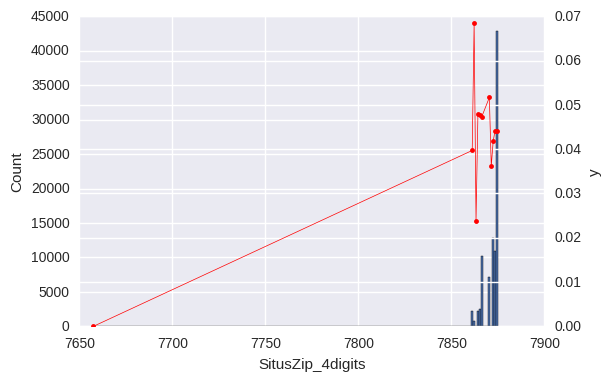

In [41]:
data['SitusZip_4digits'] = data['SitusZip'].apply(lambda x: x // 10)
var = 'SitusZip_4digits'
distinct_vals = data[var].unique()
print(distinct_vals)
num_vals = len(distinct_vals)
univariate(data, var, 'y', bins=num_vals+200)

## SquareFootage

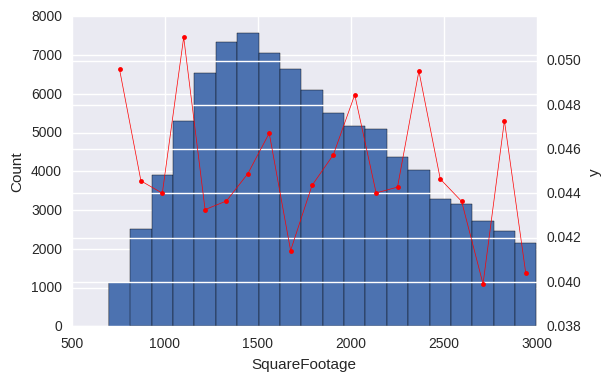

In [42]:
var = 'SquareFootage'
univariate(data, var, 'y', bins=20)

In [43]:
val, bins = np.histogram(data['SquareFootage'], bins=20)
data['SquareFootage_binned'] = np.digitize(data['SquareFootage'], bins=bins)

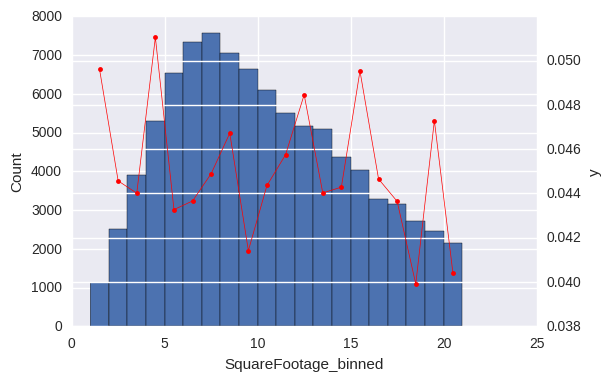

In [44]:
var = 'SquareFootage_binned'
univariate(data, var, 'y', bins=20)

In [45]:
data.to_csv('data_with_features.csv', header=True, index=False)